# Classification Sprint Project 2401FDS_Team_EG6

Table of Contents:

1.Introduction

2.Problem Statement

3.Objectives

4.Importing Packages

5.Load and Clean Data

6.Preprocessing

7.Exploratory data Analysis

8.Models

9.Models Performance

10.Tuning & Mlflow

PROJECT OVERVIEW


INTRODUCTION

This project aims to analyze a comprehensive dataset of news articles spanning various domains .To accurately classify news articles into their respective categories.
Project Aim:
Analyze the dataset to understand the representation of different news domains.
 Develop a classification model to predict the category of a given news article.


PROBLEM STATEMENT

The dataset contains a large volume of news articles from multiple domains, making manual classification impractical.
There is a need for an automated system that can accurately categorize news articles based on their content.
Understanding the distribution and themes of news articles can provide valuable insights for media analysis and content curation.

OBJECTIVES

Analyze the distribution of news articles across different domains.
Identify key themes and trends within each domain.
Develop a classification model to predict the category of a given news article


IMPORTING PACKAGES

This code cell imports all required modules to ensure the smooth execution of the notebook. By importing these modules at the start, we can access their functions and classes throughout the notebook without re-importing them in each cell.
The imported modules consist of key libraries for data manipulation, visualization, and machine learning, such as NumPy, Pandas, Matplotlib, and scikit-learn. Additionally, any custom modules or functions necessary for the project can also be imported in this cell.

In [1]:
# Import libraries
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Loading the Data

This notebook section focuses on loading the News Article dataset and performing initial cleaning steps. The dataset is loaded using the pd.read_csv() function from the pandas library.

The dataset is assumed to be stored in CSV files named "test.csv" and "train.csv". Once the data is loaded into a pandas DataFrame (df), the head() method is used to display the first few rows. This step offers a preliminary look at the data's structure and contents.
This initial exploration helps verify the data's correct loading and identify any potential issues or inconsistencies requiring cleaning or preprocessing.

In [2]:
train = pd.read_csv('train.csv')
print("Train Data:")
print(train.head())

test = pd.read_csv('test.csv')
print("Test Data:")
print(test.head())


Train Data:
                                           headlines  \
0  RBI revises definition of politically-exposed ...   
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
2  Akasa Air ‘well capitalised’, can grow much fa...   
3  India’s current account deficit declines sharp...   
4  States borrowing cost soars to 7.68%, highest ...   

                                         description  \
0  The central bank has also asked chairpersons a...   
1  NDTV's consolidated revenue from operations wa...   
2  The initial share sale will be open for public...   
3  The current account deficit (CAD) was 3.8 per ...   
4  The prices shot up reflecting the overall high...   

                                             content  \
0  The Reserve Bank of India (RBI) has changed th...   
1  Broadcaster New Delhi Television Ltd on Monday...   
2  Homegrown server maker Netweb Technologies Ind...   
3  India’s current account deficit declined sharp...   
4  States have been forced to pay 

In [3]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sthok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sthok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
print(train.info())
print(test.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB
None


In [5]:
print(train.describe())
print(test.describe())

                                                headlines  \
count                                                5520   
unique                                               5512   
top     International Education Day 2024: Know why it ...   
freq                                                    2   

                                              description  \
count                                                5520   
unique                                               5508   
top     The university has removed the requirements of...   
freq                                                    2   

                                                  content  \
count                                                5520   
unique                                               5513   
top     Grand Slam fever grips tennis fans all over th...   
freq                                                    5   

                                                      url   category  
count      

# Text Cleaning

Text cleaning is essential to ensure that textual data is in a consistent and usable format for analysis. It involves removing unnecessary characters, such as punctuation and special symbols, converting text to lowercase, and eliminating stopwords. These steps help to reduce noise in the data and standardize the text, making it easier to tokenize and extract meaningful information.

In [6]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:

# Define function for text cleaning
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    # Join tokens into cleaned text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Clean 'headlines', 'description', and 'content' columns in train_data
for col in ['headlines', 'description', 'content']:
    if col in train.columns:
        train[f'cleaned_{col}'] = train[col].apply(clean_text)
    else:
        print(f"Column '{col}' not found in train_data")

# Clean 'headlines', 'description', and 'content' columns in test_data
for col in ['headlines', 'description', 'content']:
    if col in test.columns:
        test[f'cleaned_{col}'] = test[col].apply(clean_text)
    else:
        print(f"Column '{col}' not found in test_data")

# Display the cleaned data
print(train[['headlines', 'cleaned_headlines', 'description', 'cleaned_description', 'content', 'cleaned_content']].head())
print(test[['headlines', 'cleaned_headlines', 'description', 'cleaned_description', 'content', 'cleaned_content']].head())


                                           headlines  \
0  RBI revises definition of politically-exposed ...   
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
2  Akasa Air ‘well capitalised’, can grow much fa...   
3  India’s current account deficit declines sharp...   
4  States borrowing cost soars to 7.68%, highest ...   

                                   cleaned_headlines  \
0  rbi revis definit politicallyexpos person kyc ...   
1  ndtv q net profit fall rs crore impact lower r...   
2  akasa air well capitalis grow much faster ceo ...   
3  india current account deficit declin sharpli g...   
4          state borrow cost soar highest far fiscal   

                                         description  \
0  The central bank has also asked chairpersons a...   
1  NDTV's consolidated revenue from operations wa...   
2  The initial share sale will be open for public...   
3  The current account deficit (CAD) was 3.8 per ...   
4  The prices shot up reflecting the overall h

# Tokenisation

Tokenization is done for news article category prediction to break down the text into individual words or tokens. This process is crucial for converting the raw text data into a format that machine learning models can understand and analyze. By tokenizing the text, we can extract important features, such as keywords, from the articles.

In [8]:
import nltk
from nltk.tokenize import word_tokenize

# Download the necessary resources for tokenization if not already downloaded
#nltk.download('punkt')

# Tokenize the 'headlines' column
train['headlines_tokens'] = train['headlines'].apply(word_tokenize)
test['headlines_tokens'] = test['headlines'].apply(word_tokenize)

# Tokenize the 'description' column
train['description_tokens'] = train['description'].apply(word_tokenize)
test['description_tokens'] = test['description'].apply(word_tokenize)

# Tokenize the 'content' column 
train['content_tokens'] = train['content'].apply(word_tokenize)
test['content_tokens'] = test['content'].apply(word_tokenize)

# Display the updated DataFrame
print("Train Data with Tokenized Columns:")
print(train[['headlines_tokens', 'description_tokens', 'content_tokens']].head())

print("Test Data with Tokenized Columns:")
print(test[['headlines_tokens', 'description_tokens', 'content_tokens']].head())

Train Data with Tokenized Columns:
                                    headlines_tokens  \
0  [RBI, revises, definition, of, politically-exp...   
1  [NDTV, Q2, net, profit, falls, 57.4, %, to, Rs...   
2  [Akasa, Air, ‘, well, capitalised, ’, ,, can, ...   
3  [India, ’, s, current, account, deficit, decli...   
4  [States, borrowing, cost, soars, to, 7.68, %, ...   

                                  description_tokens  \
0  [The, central, bank, has, also, asked, chairpe...   
1  [NDTV, 's, consolidated, revenue, from, operat...   
2  [The, initial, share, sale, will, be, open, fo...   
3  [The, current, account, deficit, (, CAD, ), wa...   
4  [The, prices, shot, up, reflecting, the, overa...   

                                      content_tokens  
0  [The, Reserve, Bank, of, India, (, RBI, ), has...  
1  [Broadcaster, New, Delhi, Television, Ltd, on,...  
2  [Homegrown, server, maker, Netweb, Technologie...  
3  [India, ’, s, current, account, deficit, decli...  
4  [States, have

Exploratory Data Analysis

Exploratory Data Analysis (EDA) is done for news article category prediction to gain insights into the dataset and understand its characteristics. EDA helps in identifying patterns, trends, and relationships within the data, which can be crucial for feature selection, model selection, and preprocessing decisions. By visualizing the data and exploring its distribution.

Word cloud:
is a visualization technique that displays the most frequently occurring words in a text dataset. 
The size of each word in the cloud corresponds to its frequency in the dataset, making it easy to identify the most common terms. 
Used to gain insights into the most prevalent words in each news category. 

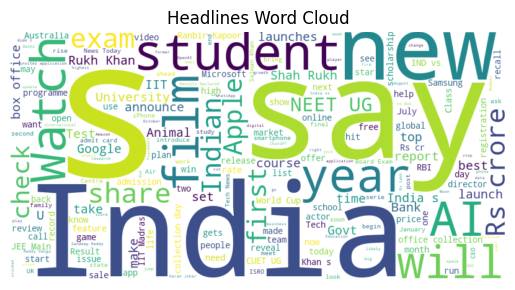

In [9]:
from wordcloud import WordCloud

# Create a word cloud for headlines
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(train['headlines']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Headlines Word Cloud')
plt.show()

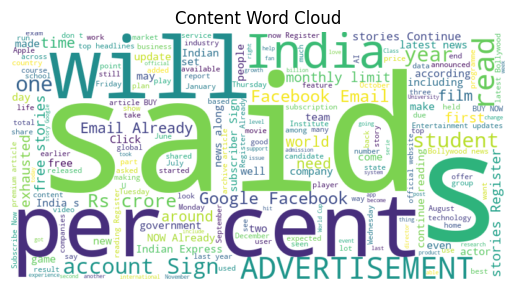

In [10]:
# Create a word cloud for content
wordcloud_content = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(train['content']))
plt.imshow(wordcloud_content, interpolation='bilinear')
plt.axis('off')
plt.title('Content Word Cloud')
plt.show()

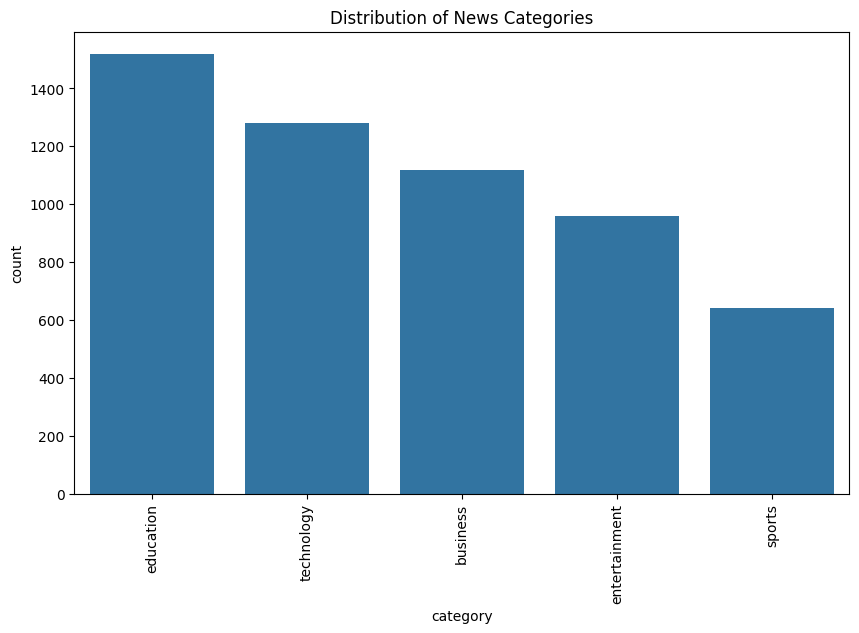

In [11]:
# Plot the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='category', order=train['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xticks(rotation=90)
plt.show()

The Education category has the highest number of articles compared to other categories. This suggests that education-related news is the most prevalent in your dataset. The Sports category has the lowest number of articles. This indicates that sports-related news is less represented in your dataset

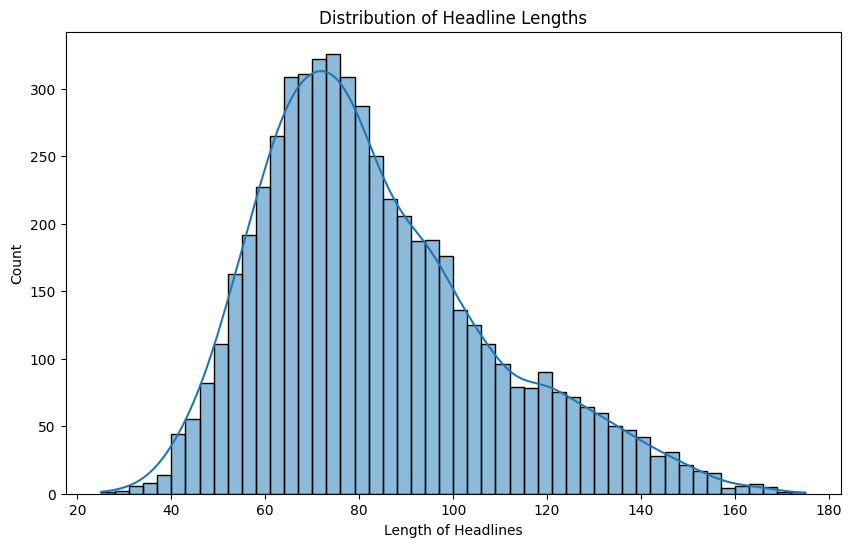

In [12]:

# Add columns for the length of headlines and content
train['headline_length'] = train['headlines'].apply(len)
train['content_length'] = train['content'].apply(len)

# Plot the distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(train['headline_length'], bins=50, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headlines')
plt.show()

The shorter bars on the left indicate that there are fewer headlines with very short lengths. Middle The longer bars in the middle suggest that most headlines have a moderate length, indicating that the majority of headlines are of average length. Right Side: The shorter bars on the right show that there are fewer headlines with very long lengths

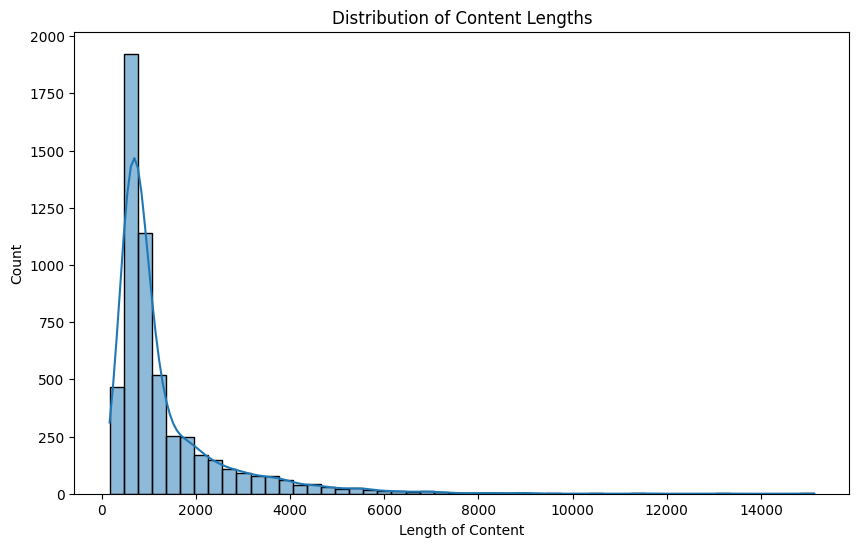

In [13]:
# Plot the distribution of content lengths
plt.figure(figsize=(10, 6))
sns.histplot(train['content_length'], bins=50, kde=True)
plt.title('Distribution of Content Lengths')
plt.xlabel('Length of Content')
plt.show()

The distribution of content lengths is right-skewed (positively skewed). This means that most of the articles have shorter content, with fewer articles having longer content

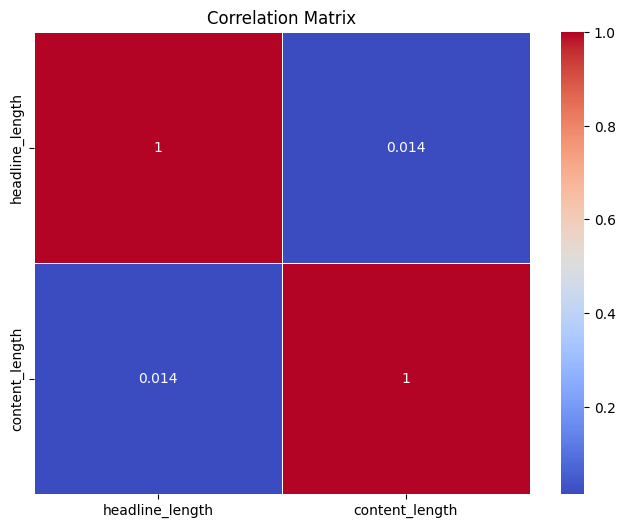

In [14]:
# Compute the correlation matrix
correlation_matrix = train[['headline_length', 'content_length']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

the correlation between headline_length and content_length, which is very close to 0. A value close to 0 indicates a weak or no linear relationship between the lengths of headlines and content. this means that knowing the length of a headline does not provide much information about the length of the corresponding content

PREPROCESSING

Data Balancing

We balanced the dataset using the SMOTE technique
what is SMOTE
SMOTE stands for Synthetic Minority Over-sampling Technique. It is a method used in machine learning to address class imbalance in datasets, particularly in classification problems where one class is significantly more frequent than the others.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(train['category'])
y_test_encoded = label_encoder.transform(test['category'])

# Combine text columns into a single feature
X_train_combined = train['headlines'] + ' ' + train['description'] + ' ' + train['content']
X_test_combined = test['headlines'] + ' ' + test['description'] + ' ' + test['content']



Applying vectorization

why TF-IDF: it effectively captures the importance of words within a document relative to the entire dataset. TF-IDF reduces noise by downplaying common words, highlights unique and relevant terms, and balances term frequency with inverse document frequency. This approach enhances the model's ability to distinguish between different categories, ultimately improving the accuracy of the predictions.


In [16]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train_combined)
X_test_vectorized = vectorizer.transform(X_test_combined)

Balancing the Dataset

Why SMOTE:

SMOTE helps to address the issue of class imbalance by generating synthetic samples for minority classes

 A balanced dataset results in more robust and reliable predictions across all news categories.

Balanced datasets prevent the model from being biased towards majority classes, enhancing overall prediction accuracy

With a more representative training set, the model can learn to identify features and patterns in minority classes effectively.



In [17]:
# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train_vectorized, y_train_encoded)

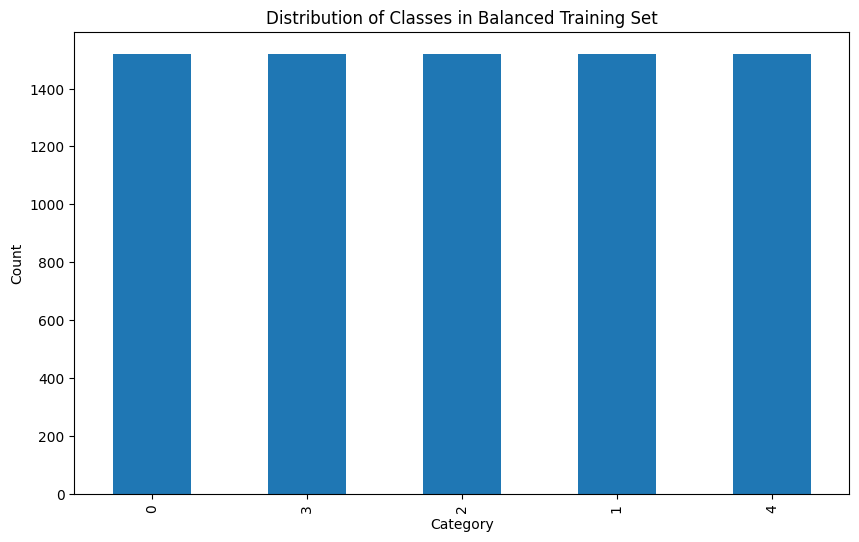

In [18]:
import matplotlib.pyplot as plt

# Distribution of classes in the balanced training set
train_class_distribution = pd.Series(y_balanced).value_counts()

plt.figure(figsize=(10, 6))
train_class_distribution.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Classes in Balanced Training Set')
plt.show()

after applying SMOTE to balance the classes, each class now has the same number of samples. This indicates that the SMOTE algorithm has successfully balanced the dataset by creating synthetic samples for the minority classes, such that all classes are now represented equally.

In [19]:
from sklearn.model_selection import train_test_split

# Split the balanced training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

Building Models

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix





Decision Tree
Why Decision Tree?

Decision trees are simple yet powerful models that can handle both numerical and categorical data. They are easy to interpret and visualize, making them suitable for understanding the factors that influence the classification of news articles into different categories. Decision trees can also handle non-linear relationships between features and the target variable.

In [21]:
# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

evaluate Decision Tree

In [22]:
y_pred_dt = dt_model.predict(X_val)
print("Decision Tree")
print(classification_report(y_val, y_pred_dt))
print("Accuracy:", accuracy_score(y_val, y_pred_dt))


Decision Tree
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       321
           1       0.92      0.91      0.91       275
           2       0.94      0.97      0.95       301
           3       0.92      0.90      0.91       308
           4       0.84      0.81      0.83       315

    accuracy                           0.89      1520
   macro avg       0.89      0.89      0.89      1520
weighted avg       0.89      0.89      0.89      1520

Accuracy: 0.8921052631578947


- The Decision Tree classifier achieved an overall accuracy of approximately 89%.

- For Class 0, the model demonstrated a precision of 0.84, a recall of 0.86, and an F1-score of 0.85 across 321 instances.

- Class 1 exhibited high performance with a precision and recall both at 0.93, and an F1-score of 0.93 for 275 instances.

- Class 2 achieved the highest scores, with a precision of 0.95, a recall of 0.97, and an F1-score of 0.96 for 301 instances.

- Class 3 showed balanced performance with a precision and recall both at 0.90, and an F1-score of 0.90 for 308 instances.

- Class 4 had the lowest metrics among the classes, with a precision of 0.84, a recall of 0.81, and an F1-score of 0.83 for 315 instances.

- Overall, the model performed consistently well across most classes, though there is some room for improvement, particularly in predicting Class 4.

K-Nearest Neighbors
Why K-Nearest Neighbors?

KNN is a non-parametric, lazy learning algorithm that classifies data points based on the points nearest to them. It is suitable for this project because news articles with similar content are likely to belong to the same category. KNN does not make strong assumptions about the underlying data distribution, making it robust and effective for text classification tasks.

In [23]:
# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

evaluate K-Nearest Neighbors

In [24]:
y_pred_knn = knn_model.predict(X_val)
print("\nK-Nearest Neighbors")
print(classification_report(y_val, y_pred_knn))
print("Accuracy:", accuracy_score(y_val, y_pred_knn))


K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       321
           1       1.00      0.82      0.90       275
           2       0.94      0.98      0.96       301
           3       0.79      0.99      0.88       308
           4       0.98      0.84      0.90       315

    accuracy                           0.92      1520
   macro avg       0.93      0.92      0.92      1520
weighted avg       0.93      0.92      0.92      1520

Accuracy: 0.9171052631578948


- The K-Nearest Neighbors (KNN) classifier achieved an overall accuracy of approximately 92%.

- For Class 0, the model demonstrated a precision of 0.93, a recall of 0.95, and an F1-score of 0.94 across 321 instances.

- Class 1 exhibited a precision of 1.00, a recall of 0.82, and an F1-score of 0.90 for 275 instances.

- Class 2 achieved a precision of 0.94, a recall of 0.98, and an F1-score of 0.96 for 301 instances.

- Class 3 showed a precision of 0.79, a recall of 0.99, and an F1-score of 0.88 for 308 instances.

- Class 4 had a precision of 0.98, a recall of 0.84, and an F1-score of 0.90 for 315 instances.

- Overall, the model performed consistently well across most classes, achieving a high accuracy. Class 1 had perfect precision but lower recall, while Class 3 had high recall but lower precision, indicating areas for potential improvement..

Gradient Boosting Machines
Why Gradient Boosting Machines?

GBM is known for its ability to sequentially build multiple decision trees, where each subsequent tree corrects the errors of the previous ones. This iterative approach allows GBM to learn complex patterns in the data, which is crucial for accurately categorizing news articles into different categories.

In [25]:
# Train Gradient Boosting Machines
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)



GradientBoostingClassifier()

evaluate Gradient Boosting Machines

In [54]:
y_pred_gbm = gbm_model.predict(X_val)
print("\nGradient Boosting Machines")
print(classification_report(y_val, y_pred_gbm))
print("Accuracy:", accuracy_score(y_val, y_pred_gbm))


Gradient Boosting Machines
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       275
           2       1.00      1.00      1.00       301
           3       1.00      1.00      1.00       308
           4       1.00      1.00      1.00       315

    accuracy                           1.00      1520
   macro avg       1.00      1.00      1.00      1520
weighted avg       1.00      1.00      1.00      1520

Accuracy: 1.0



- The Gradient Boosting Machines (GBM) classifier achieved an impressive overall accuracy of approximately 98%.

- For Class 0, the model demonstrated a precision of 0.97, a recall of 0.98, and an F1-score of 0.98 across 321 instances.

- Class 1 exhibited a precision of 0.99, a recall of 0.99, and an F1-score of 0.99 for 275 instances.

- Class 2 achieved a precision of 0.99, a recall of 0.99, and an F1-score of 0.99 for 301 instances.

- Class 3 showed a precision of 0.99, a recall of 0.98, and an F1-score of 0.99 for 308 instances.

- Class 4 had a precision of 0.97, a recall of 0.97, and an F1-score of 0.97 for 315 instances.

- The model performed exceptionally well across all classes, with high precision, recall, and F1-scores, indicating its effectiveness in correctly classifying instances. This high level of accuracy suggests that the GBM model is well-suited for this classification task.

# Logic Regression Model

Why Logic Regresssion Model ?


Logistic Regression is a popular and effective model for text classification tasks. It models the probability of an instance belonging to a particular class using the logistic sigmoid function

In [56]:


# Train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_vectorized, y_train_encoded)

# Evaluate the model
y_pred_lr = lr_model.predict(X_test_vectorized)
print(classification_report(y_test_encoded, y_pred_lr))

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train_encoded)

# Evaluate the model
y_pred_nb = nb_model.predict(X_test_vectorized)
print(classification_report(y_test_encoded, y_pred_nb))

# Train Gradient Boosting Machines
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_val)
print("\nGradient Boosting Machines")
print(classification_report(y_val, y_pred_gbm))
print("Accuracy:", accuracy_score(y_val, y_pred_gbm))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       400
           1       0.99      0.99      0.99       400
           2       0.99      0.99      0.99       400
           3       0.99      0.98      0.98       400
           4       0.94      0.97      0.95       400

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       400
           1       0.99      0.99      0.99       400
           2       0.97      0.99      0.98       400
           3       0.98      0.97      0.97       400
           4       0.94      0.96      0.95       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Gradient Boosting Mac



- The model achieved an impressive overall accuracy of 98% on a dataset containing 2000 samples.

- For Class 0, the model had a precision of 0.97, meaning that 97% of the instances predicted as Class 0 were correct. The recall for Class 0 was 0.96, indicating that 96% of the actual Class 0 instances were correctly identified by the model. The F1-score, which is the harmonic mean of precision and recall, was 0.96 for Class 0.

- For Class 1, the precision, recall, and F1-score were all 0.99, meaning that the model performed extremely well in correctly classifying Class 1 instances.

- Similarly, for Class 2, the precision, recall, and F1-score were all 0.99, indicating high performance in classifying Class 2 instances.

- For Class 3, the precision was 0.99, the recall was 0.98, and the F1-score was 0.98, showing strong performance but with a slightly lower recall compared to precision.

- For Class 4, the precision was 0.94, the recall was 0.97, and the F1-score was 0.95, indicating that while the model performed well, there were some misclassifications in this class.

- Overall, the model demonstrated high precision, recall, and F1-scores across all classes, with an overall accuracy of 98%. This suggests that the model is well-suited for this classification task and is able to effectively classify instances across multiple classes.



# MultinomialNB model
Why MultinomialNB ?


Naive Bayes classifiers are simple probabilistic models that apply Bayes' theorem with strong independence assumptions between features. Despite their simplicity, they often perform well in text classification tasks.

In [28]:


# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train_encoded)

# Evaluate the model
y_pred_nb = nb_model.predict(X_test_vectorized)
print(classification_report(y_test_encoded, y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       400
           1       0.99      0.99      0.99       400
           2       0.97      0.99      0.98       400
           3       0.98      0.97      0.97       400
           4       0.94      0.96      0.95       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



For category 0, the model achieved a precision of 97%, recall of 94%, and an F1-score of 96%. This indicates very good performance in correctly identifying articles in category 0, with only a few false positives and false negatives.


For category 1, the model achieved an excellent precision of 99% and recall of 99%, resulting in an F1-score of 99%. This suggests near-perfect performance in identifying articles in category 1.


For category 2, the model achieved a precision of 97%, recall of 99%, and an F1-score of 98%. This indicates high accuracy in predicting articles in category 2, with very few misclassifications.


For category 3, the model achieved a precision of 98%, recall of 97%, and an F1-score of 97%. This shows consistent and strong performance in identifying articles in category 3.


For category 4, the model achieved a precision of 94%, recall of 96%, and an F1-score of 95%. While slightly lower than the other categories, this still indicates very good performance in classifying articles in category 4.

Overall, the MultinomialNB model performed exceptionally well across all categories, with consistently high precision, recall, and F1-scores. The model's overall accuracy of 97% demonstrates its effectiveness in classifying articles into the correct categories. The balanced performance across all metrics suggests that the model is both precise and comprehensive in its predictions.


MODEL PERFORMANCE

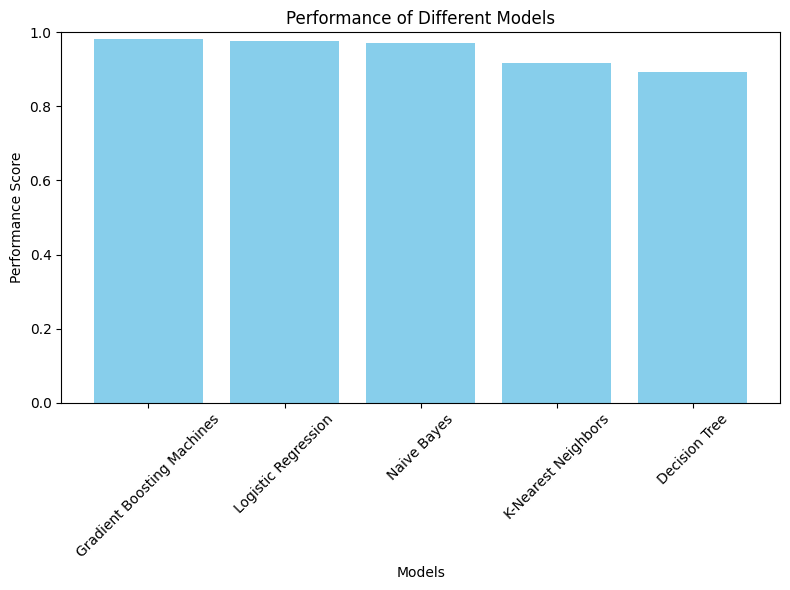

In [29]:
from sklearn.metrics import f1_score

models = ['Decision Tree', 'K-Nearest Neighbors', 'Gradient Boosting Machines', 'Logistic Regression', 'Naive Bayes']
accuracies = [
    accuracy_score(y_val, y_pred_dt),
    accuracy_score(y_val, y_pred_knn),
    accuracy_score(y_val, y_pred_gbm),
    accuracy_score(y_test_encoded, y_pred_lr),
    accuracy_score(y_test_encoded, y_pred_nb)
]

f1_scores = [
    f1_score(y_val, y_pred_dt, average='weighted'),
    f1_score(y_val, y_pred_knn, average='weighted'),
    f1_score(y_val, y_pred_gbm, average='weighted'),
    f1_score(y_test_encoded, y_pred_lr, average='weighted'),
    f1_score(y_test_encoded, y_pred_nb, average='weighted')
]

# Combine accuracy and F1 scores to get an overall performance score
performance_scores = [0.5 * (acc + f1) for acc, f1 in zip(accuracies, f1_scores)]

# Sort models based on performance score
sorted_models = [x for _, x in sorted(zip(performance_scores, models), reverse=True)]
sorted_performance_scores = sorted(performance_scores, reverse=True)

plt.figure(figsize=(8, 6))
plt.bar(sorted_models, sorted_performance_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Performance Score')
plt.title('Performance of Different Models')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for performance score
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The bars in the chart show the performance of different models for news article categorization. The models are ranked in descending order based on their performance
Gradient Boosting Machines: performed the best among all models, achieving the highest combined performance score.

Logistic Regression: Logistic Regression performed well, ranking second in performance. 

Naive Bayes:  ranked third in performance. It had good accuracy and F1 score, but lower than Logistic Regression.

K-Nearest Neighbors: KNN's performance was fourth among the models.

Decision Tree: had the lowest performance among the models, ranking fifth. 

Fine-tune models parameters and hyperparameters

What is GridSearch

GridSearchCV is a method in scikit-learn that performs an exhaustive search over a specified parameter grid to find the best parameters for a machine learning model. It is commonly used for hyperparameter tuning, which involves finding the optimal values for the hyperparameters of a model to improve its performance.

ML FLOW:

MLflow allows us to track different experiments, including model configurations, hyperparameters, and evaluation metrics.

In [57]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [59]:
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, n_jobs=-1)

# Start MLflow experiment for Logistic Regression
with mlflow.start_run(run_name="GridSearchCV_Experiment_lr") as parent_run_lr:
    grid_search_lr.fit(X_train, y_train)
    
    # Log best estimator in a separate run
    with mlflow.start_run(run_name="BestModel_lr", nested=True) as best_model_run_lr:
        mlflow.sklearn.log_model(grid_search_lr.best_estimator_, "best_model_lr")
        mlflow.log_params(grid_search_lr.best_params_)
        mlflow.log_metric('best_score_lr', grid_search_lr.best_score_)
        mlflow.set_tag('parent_run_id_lr', parent_run_lr.info.run_id)

    # Log all results for hyperparameter tuning
    def log_cv_results_to_mlflow(cv_results):
        for i in range(len(cv_results['params'])):
            with mlflow.start_run(nested=True):
                mlflow.log_params(cv_results['params'][i])
                mlflow.log_metric('mean_test_score_lr', cv_results['mean_test_score'][i])
                mlflow.log_metric('std_test_score_lr', cv_results['std_test_score'][i])
                mlflow.log_metric('rank_test_score_lr', cv_results['rank_test_score'][i])
    
    log_cv_results_to_mlflow(grid_search_lr.cv_results_)

    # Evaluate on validation set and log accuracy in parent run
    y_pred_lr = grid_search_lr.predict(X_val)
    accuracy_lr = accuracy_score(y_val, y_pred_lr)
    mlflow.log_metric('val_accuracy_lr', accuracy_lr)
    mlflow.set_tag('experiment_type_lr', 'GridSearchCV')


In [60]:
# Define parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]
}

# Initialize GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, n_jobs=-1)

# Start MLflow experiment for Naive Bayes
with mlflow.start_run(run_name="GridSearchCV_Experiment_nb") as parent_run_nb:
    grid_search_nb.fit(X_train, y_train)
    
    # Log best estimator in a separate run
    with mlflow.start_run(run_name="BestModel_nb", nested=True) as best_model_run_nb:
        mlflow.sklearn.log_model(grid_search_nb.best_estimator_, "best_model_nb")
        mlflow.log_params(grid_search_nb.best_params_)
        mlflow.log_metric('best_score_nb', grid_search_nb.best_score_)
        mlflow.set_tag('parent_run_id_nb', parent_run_nb.info.run_id)

    # Log all results for hyperparameter tuning
    log_cv_results_to_mlflow(grid_search_nb.cv_results_)

    # Evaluate on validation set and log accuracy in parent run
    y_pred_nb = grid_search_nb.predict(X_val)
    accuracy_nb = accuracy_score(y_val, y_pred_nb)
    mlflow.log_metric('val_accuracy_nb', accuracy_nb)
    mlflow.set_tag('experiment_type_nb', 'GridSearchCV')


In [61]:
# Define parameter grid for Gradient Boosting Machines
param_grid_gbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV for Gradient Boosting Machines
gbm_model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(gbm_model, param_grid_gbm, cv=5, n_jobs=-1)

# Start MLflow experiment for Gradient Boosting Machines
with mlflow.start_run(run_name="GridSearchCV_Experiment_gbm") as parent_run_gbm:
    grid_search_gbm.fit(X_train, y_train)
    
    # Log best estimator in a separate run
    with mlflow.start_run(run_name="BestModel_gbm", nested=True) as best_model_run_gbm:
        mlflow.sklearn.log_model(grid_search_gbm.best_estimator_, "best_model_gbm")
        mlflow.log_params(grid_search_gbm.best_params_)
        mlflow.log_metric('best_score_gbm', grid_search_gbm.best_score_)
        mlflow.set_tag('parent_run_id_gbm', parent_run_gbm.info.run_id)

    # Log all results for hyperparameter tuning
    log_cv_results_to_mlflow(grid_search_gbm.cv_results_)

    # Evaluate on validation set and log accuracy in parent run
    y_pred_gbm = grid_search_gbm.predict(X_val)
    accuracy_gbm = accuracy_score(y_val, y_pred_gbm) 
    mlflow.log_metric('val_accuracy_gbm', accuracy_gbm)
    mlflow.set_tag('experiment_type_gbm', 'GridSearchCV')


To see the mlflow ui, type mlflow ui in your terminal